In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from tqdm.notebook import tqdm

def get_contenct(patient_folder_adrs,d=0):
  if d == 0:
    folder_adrs = sorted(glob(patient_folder_adrs+"/*"))[0]
    type_of = "post"
  else:
    folder_adrs = sorted(glob(patient_folder_adrs+"/*"))[1]
    type_of = "pre"

  op_type = os.path.basename(os.path.normpath(folder_adrs))

  for i in sorted(glob(folder_adrs+"/*")):
    h = os.path.basename(os.path.normpath(i)).split("_")
    patient_id = h[0]
    if h[1] == "heartrate" and h[2] == "seconds":
      break
  return i,patient_id,type_of

In [4]:
from glob import glob
import os

path = "/content/drive/MyDrive/Iqram Sir/Fitabase data pulls - seperate"

In [5]:
!pip install pyhrv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spectrum: filename=spectrum-0.8.1-cp39-cp39-linux_x86_64.whl size=237784 sha256=5c3a8bbf3705921dc32bebd9a74fcb63e3dbd43dbd2c6141c80d0d0d8245ebb9
  Stored in directory: /root/.cache/pip/wheels/a0/03/05/e7ced8d2ae677d5c887dafb37619e6f0f978b2f5e60b5cd8e9
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64214 sha256=612c5a67f3b07414177b91fa9a99dfbd960b123cded70bcd141c1b86cac50a4f
  Stored in directory: /root/.cache/pip/wheels/03/61/14/9e079fd8b2ae87fdf

In [6]:
g= sorted(glob(path+"/*"))[0]

add,pid,state = get_contenct(g,1)
print(add)
print(pid)
print(state)

import pandas as pd
df = pd.read_csv(add)


time = []
hr = []
rr = []

for i in tqdm(range(df.shape[0])):
  time.append(df["Time"][i])
  hr.append(df["Value"][i])
  rr.append(60/df["Value"][i])

d = {
    "Time" : time,
     "HR"  : hr,
     "RR"  : rr
}


df2 = pd.DataFrame(d)

/content/drive/MyDrive/Iqram Sir/Fitabase data pulls - seperate/001-JV/001 Pre-op/001-JV_heartrate_seconds_20211202_20221216.csv
001-JV
pre


  0%|          | 0/350946 [00:00<?, ?it/s]

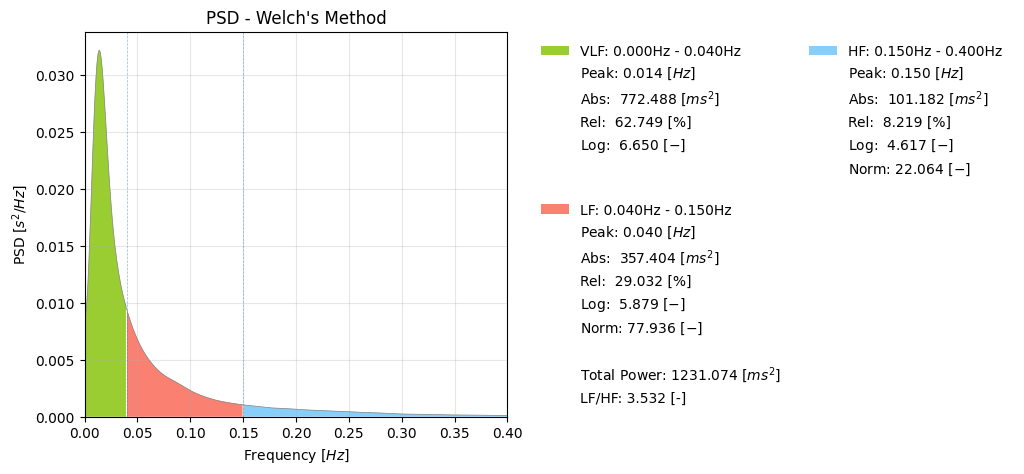

ReturnTuple(fft_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), fft_peak=(0.013671875, 0.0400390625, 0.150390625), fft_abs=(772.4878611668571, 357.40365010715215, 101.18247720832358), fft_rel=(62.74910106086959, 29.031857829094342, 8.219041110036065), fft_log=(6.6496162949485775, 5.87886581561988, 4.616925591745773), fft_norm=(77.9359925690214, 22.064007430978606), fft_ratio=3.53226823426449, fft_total=1231.0739884823329, fft_plot=<Figure size 1200x500 with 2 Axes>, fft_nfft=4096, fft_window='hamming', fft_resampling_frequency=4, fft_interpolation='cubic')


In [7]:
# Import packages
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = df2["RR"]

# Compute the PSD and frequency domain parameters using the NNI series
result = fd.welch_psd(nni)

# Access peak frequencies using the key 'fft_peak'
print(result)

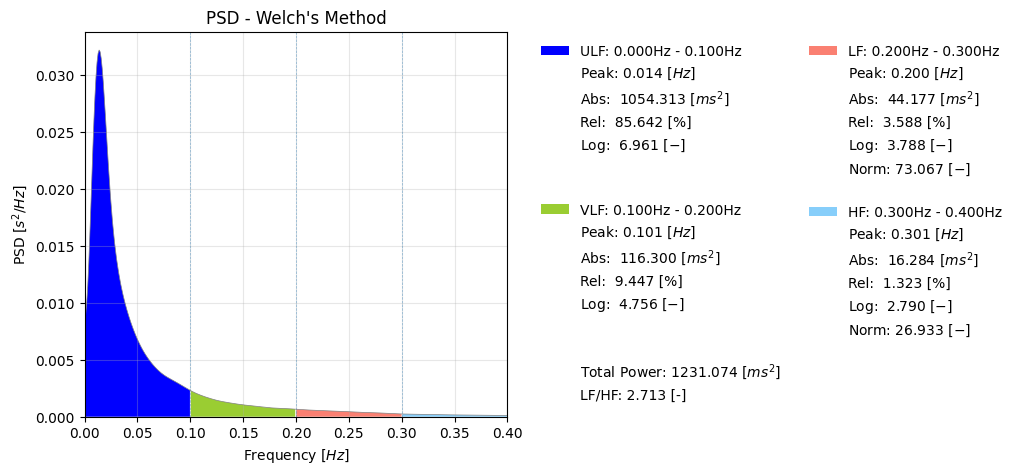

In [8]:
# Define custom frequency bands and add the ULF band
fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}

# Compute the PSD with custom frequency bands
result = fd.welch_psd(nni, fbands=fbands)

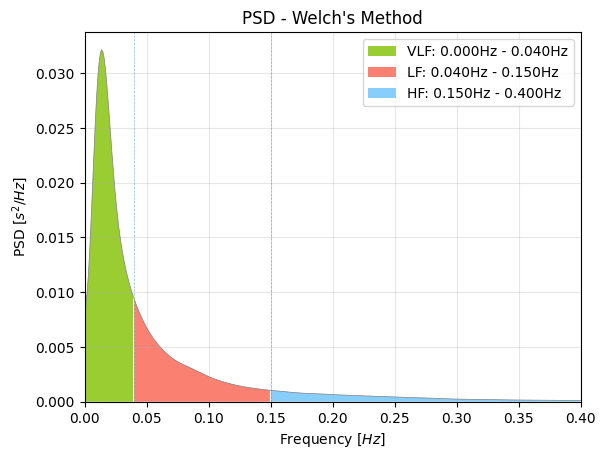

In [9]:
# Compute the PSD without the parameters being shown on the right side of the figure
result = fd.welch_psd(nni, show_param=False)

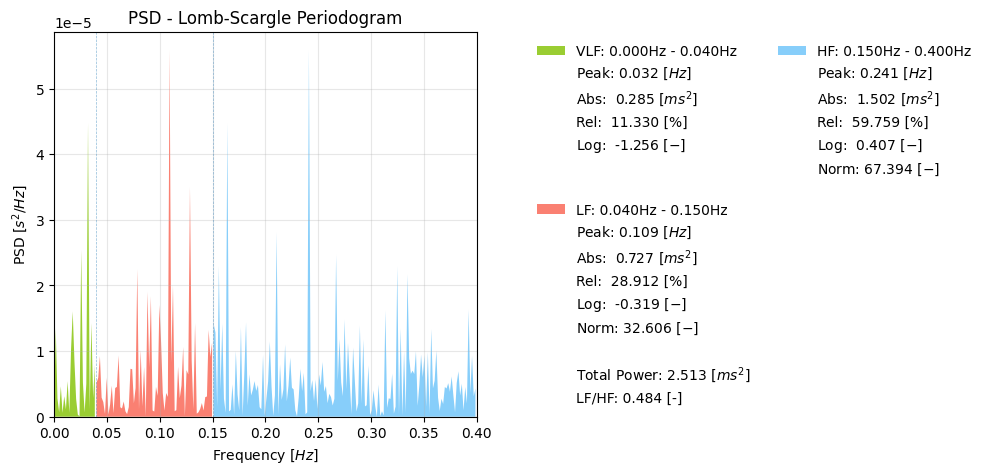

ReturnTuple(lomb_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), lomb_peak=(0.03215686274509804, 0.10933333333333334, 0.2411764705882353), lomb_abs=(0.2847457759700602, 0.7266367283710354, 1.5019219556697496), lomb_rel=(11.329537686366557, 28.911607802896267, 59.75885451073718), lomb_log=(-1.2561585109349864, -0.3193286122052351, 0.4067455917188252), lomb_norm=(32.605680683871874, 67.39431931612813), lomb_ratio=0.48380458493730955, lomb_total=2.513304460010845, lomb_plot=<Figure size 1200x500 with 2 Axes>, lomb_nfft=256, lomb_ma=None)


In [10]:
# Import packages
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = df2["RR"]

# Compute the PSD and frequency domain parameters using the NNI series
result = fd.lomb_psd(nni)

# Access peak frequencies using the key 'lomb_peak'
print(result)

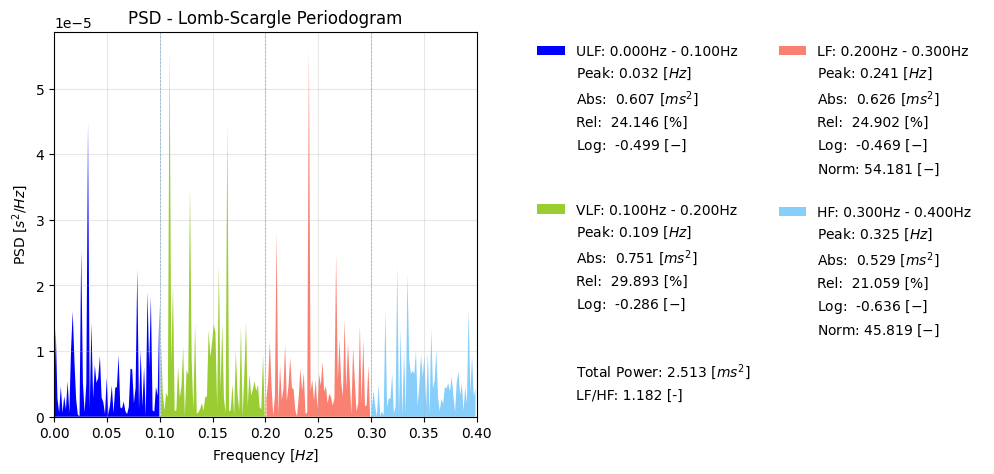

In [11]:
# Define custom frequency bands and add the ULF band
fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}

# Compute the PSD with custom frequency bands
result = fd.lomb_psd(nni, fbands=fbands)

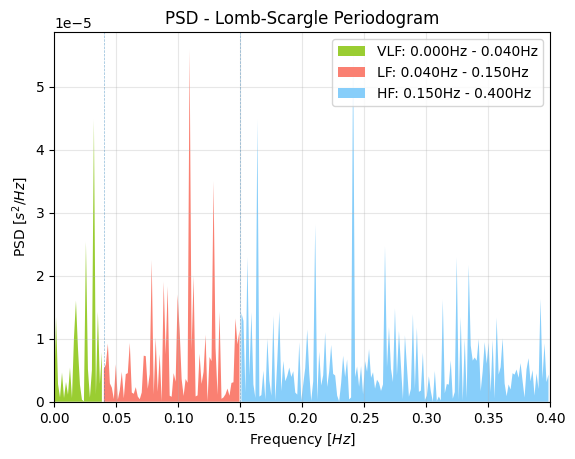

In [12]:
# Compute the PSD without the parameters being shown on the right side of the figure
result = fd.lomb_psd(nni, show_param=False)

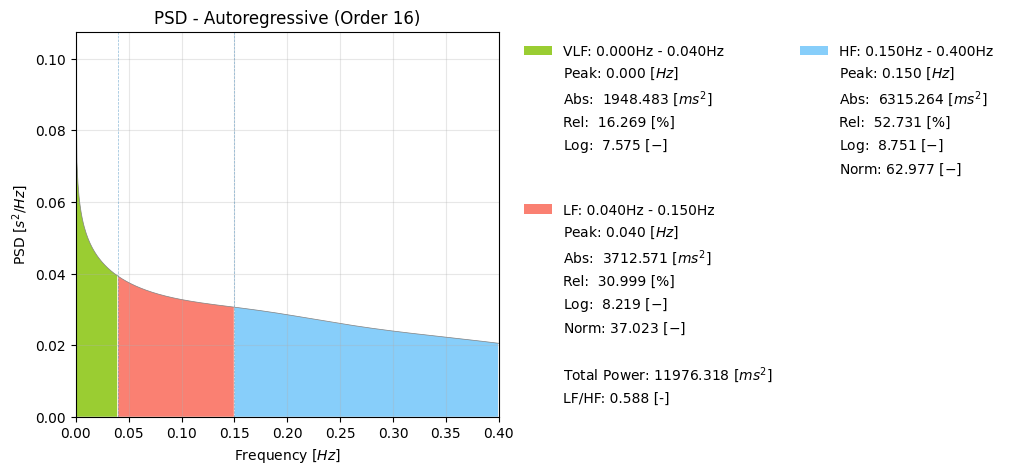

ReturnTuple(ar_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), ar_peak=(0.0, 0.0400390625, 0.150390625), ar_abs=(1948.4826812394344, 3712.570759126146, 6315.264124691453), ar_rel=(16.269464053996597, 30.999267838039046, 52.731268107964354), ar_log=(7.574806236486471, 8.2194798426266, 8.750724858880886), ar_norm=(37.02265545992686, 62.97734454007314), ar_ratio=0.5878726029226106, ar_total=11976.317565057034, ar_nfft=4096, ar_order=16, ar_resampling_frequency=4, ar_interpolation='cubic', ar_plot=<Figure size 1200x500 with 2 Axes>)


In [18]:
# Import packages
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = df2["RR"]

# Compute the PSD and frequency domain parameters using the NNI series
result = fd.ar_psd(nni)

# Access peak frequencies using the key 'ar_peak'
print(result)

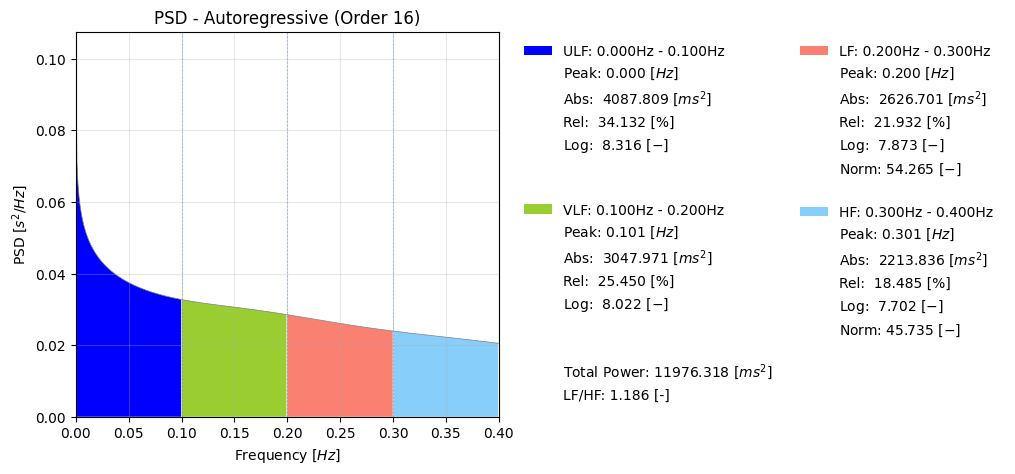

ReturnTuple(ar_bands=ReturnTuple(ulf=[0.0, 0.1], vlf=[0.1, 0.2], lf=[0.2, 0.3], hf=[0.3, 0.4]), ar_peak=(0.0, 0.1005859375, 0.2001953125, 0.30078125), ar_abs=(4087.808824602115, 3047.9714852530483, 2626.7009689881593, 2213.8362862137105), ar_rel=(34.13243513623085, 25.44998885255038, 21.93245924483508, 18.485116766383673), ar_log=(8.31576436577097, 8.022231561530837, 7.8734839533579954, 7.702482165734942), ar_norm=(54.26465763000548, 45.73534236999452), ar_ratio=1.186492870021823, ar_total=11976.317565057034, ar_nfft=4096, ar_order=16, ar_resampling_frequency=4, ar_interpolation='cubic', ar_plot=<Figure size 1200x500 with 2 Axes>)


In [16]:
# Define custom frequency bands and add the ULF band
fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}

# Compute the PSD with custom frequency bands
result = fd.ar_psd(nni, fbands=fbands)

# Access peak frequencies using the key 'ar_peak'
print(result)

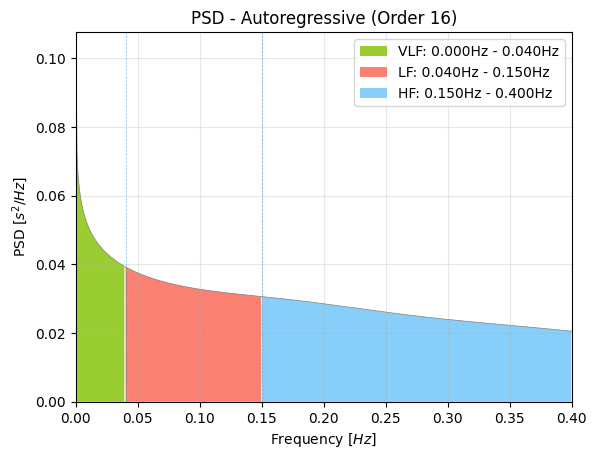

ReturnTuple(ar_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), ar_peak=(0.0, 0.0400390625, 0.150390625), ar_abs=(1948.4826812394344, 3712.570759126146, 6315.264124691453), ar_rel=(16.269464053996597, 30.999267838039046, 52.731268107964354), ar_log=(7.574806236486471, 8.2194798426266, 8.750724858880886), ar_norm=(37.02265545992686, 62.97734454007314), ar_ratio=0.5878726029226106, ar_total=11976.317565057034, ar_nfft=4096, ar_order=16, ar_resampling_frequency=4, ar_interpolation='cubic', ar_plot=<Figure size 640x480 with 1 Axes>)


In [17]:
# Compute the PSD without the parameters being shown on the right side of the figure
result = fd.ar_psd(nni, show_param=False)

# Access peak frequencies using the key 'ar_peak'
print(result)

In [22]:
# Import packages
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = df2["RR"]

# Compute the PSDs and the comparison plot using the Welch's method and 60s segments
result = fd.psd_comparison(nni=nni, duration=100, method='welch')

# Access peak frequencies of the first segment using the key 'fft_peak'
print(result)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
# Define custom frequency bands and add the ULF band
fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}

# Compute the PSDs with custom frequency bands
result = fd.psd_comparison(nni=nni, duration=100, method='welch', fbands=fbands)


Output hidden; open in https://colab.research.google.com to view.

In [25]:
# Define input parameters for the 'welch_psd()' function & plot the PSD comparison
kwargs_welch = {'nfft': 2**8, 'detrend': False, 'window': 'hann'}
result = fd.psd_comparison(nni=nni, duration=100, method='welch', kwargs_method=kwargs_welch)

# Define input parameters for the 'lomb_psd()' function & plot the PSD comparison
kwargs_lomb = {'nfft': 2**8, 'ma_order': 5}
result = fd.psd_comparison(nni=nni, duration=100, method='lomb', kwargs_method=kwargs_lomb)

# Define input parameters for the 'ar_psd()' function & plot the PSD comparison
kwargs_ar = {'nfft': 2**8, 'order': 30}
result = fd.psd_comparison(nni=nni, duration=100, method='ar', kwargs_method=kwargs_ar)

Output hidden; open in https://colab.research.google.com to view.

In [26]:
# Define custom input parameters using the kwargs dictionaries
kwargs_welch = {
   'nfft': 2**8,        # Valid key, will be used
   'threshold': 2**8    # Invalid key for the Welch's method domain, will be ignored
}

# Generate PSD comparison plot
result = fd.psd_comparison(nni=nni, duration=100, method='welch', kwargs_method=kwargs_welch)

Output hidden; open in https://colab.research.google.com to view.